# 01.Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'order_reviews_final.csv'), index_col = False)

In [5]:
# Check dataset

df.head()

,Unnamed: 0,order_id,review_score,order_lead_time,order_days_delayed,days_late,lead_time_days
0,2,00010242fe8c5a6d1ba2dd792cb16214,5.0,7.614421,-8.011250,5-10 days early,5-10 days
1,3,00018f77f2f0320c557190d7a144bdd3,4.0,16.216181,-2.330278,0-5 days early,15-20 days
2,4,000229ec398224ef6ca0657da4fc703e,5.0,7.948437,-13.444954,>10 days early,5-10 days
3,5,00024acbcdf0a6daa1e931b038114c75,4.0,6.147269,-5.435660,5-10 days early,5-10 days
4,6,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,25.114352,-15.303808,>10 days early,>20 days


In [6]:
# Drop columns

df = df.drop(columns = ['Unnamed: 0','order_id','days_late','lead_time_days'])

In [7]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

review_score          0
order_lead_time       0
order_days_delayed    0
dtype: int64

In [8]:
# Drop row with missing value

df = df.dropna()

# 02. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\clust

[-18266966.597286742,
 -10867665.163323486,
 -8192381.797330273,
 -6167040.120550904,
 -4955723.1098477105,
 -4205856.421389403,
 -3515103.7519924394,
 -3102636.3314233674,
 -2784881.8801737097]

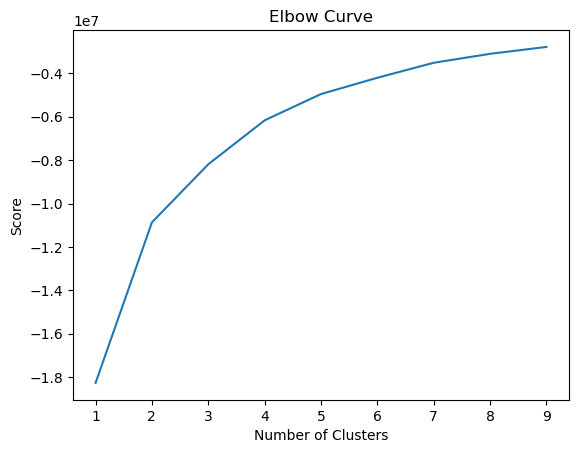

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df.head()

,review_score,order_lead_time,order_days_delayed,clusters
0,5.0,7.614421,-8.011250,0
1,4.0,16.216181,-2.330278,1
2,5.0,7.948437,-13.444954,0
3,4.0,6.147269,-5.435660,0
4,5.0,25.114352,-15.303808,1


In [16]:
df['clusters'].value_counts()

0    47684
3    22408
1    20462
2     3871
4       74
Name: clusters, dtype: int64

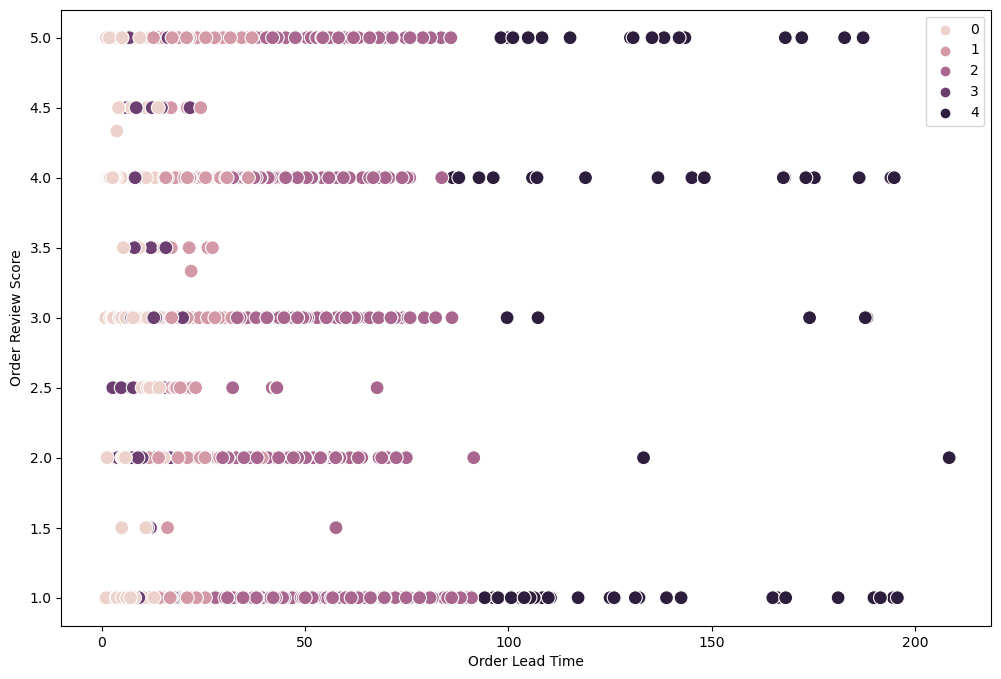

In [17]:
# Plot the clusters for "Number of product pictures on the listing" and "Units Sold"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['order_lead_time'], y=df['review_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Order Lead Time') # Label x-axis.
plt.ylabel('Order Review Score') # Label y-axis.
plt.show()

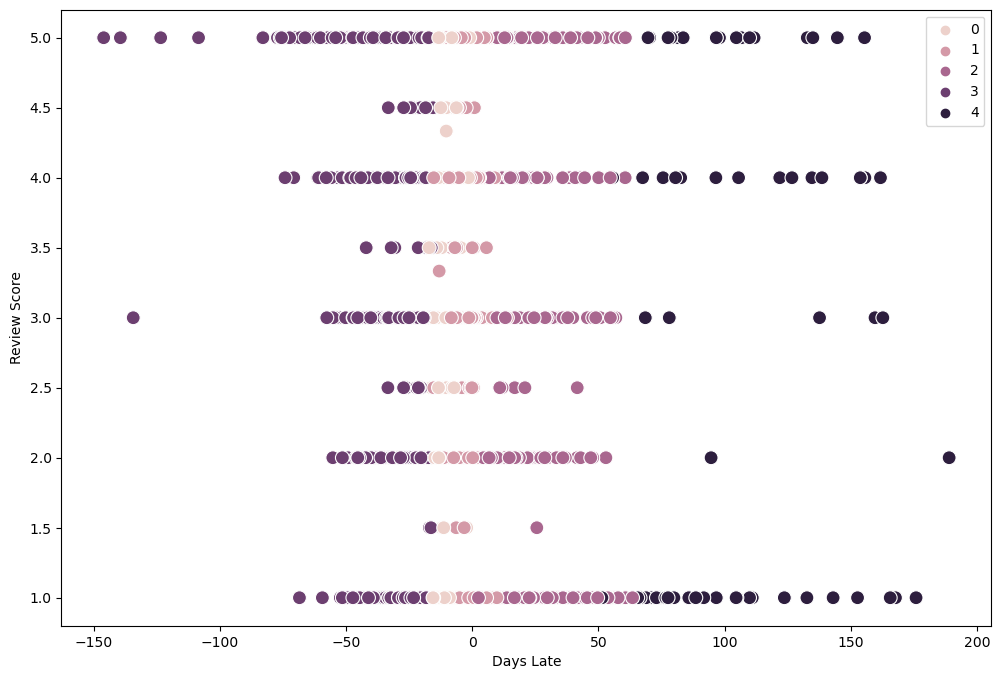

In [18]:
# Plot the clusters for the "Review score" and "Units Sold"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['order_days_delayed'], y=df['review_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Days Late') 
plt.ylabel('Review Score') 
plt.show()

In [19]:
df.loc[df['clusters'] == 4, 'cluster'] = 'blue violet'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'dark_pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [20]:
df_agg = df.groupby('cluster').agg({'review_score':['mean', 'median'], 
                         'order_lead_time':['mean', 'median'], 
                         'order_days_delayed':['mean', 'median'],})

In [21]:
df_agg

review_score        order_lead_time              \
                    mean median            mean      median   
cluster                                                       
blue violet     2.824324    3.0      133.849334  128.007176   
dark purple     4.313950    5.0        9.989753    9.172008   
dark_pink       3.938072    4.0       20.152299   19.266765   
pink            4.366902    5.0        7.989727    7.889120   
purple          1.859985    1.0       40.132544   37.352002   

            order_days_delayed             
                          mean     median  
cluster                                    
blue violet         106.371750  97.345226  
dark purple         -22.492218 -20.364716  
dark_pink            -5.512952  -6.033779  
pink                -10.572212 -11.259444  
purple               13.552033  10.916366

In [22]:
df_agg.to_clipboard()